# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


In [1]:
# Importujeme základní vykreslovací modul
import matplotlib.pyplot as plt

# A samozřejmě numpy
import numpy as np

# Občas se hodí i matematika
import math
import random

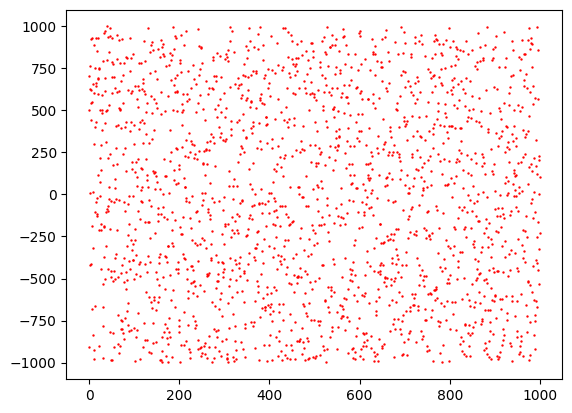

In [3]:
x = np.linspace(0,1000, 2000)
y = np.array([random.randint(-1000,1000) for _ in x])
plt.scatter(x,y, s=0.5, c ='r')


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imshow` a `contour`.


In [4]:
def f(x, y):
    sqrroot = np.sqrt(x**2 + y**2)
    z = np.sin(sqrroot) / sqrroot
    return z

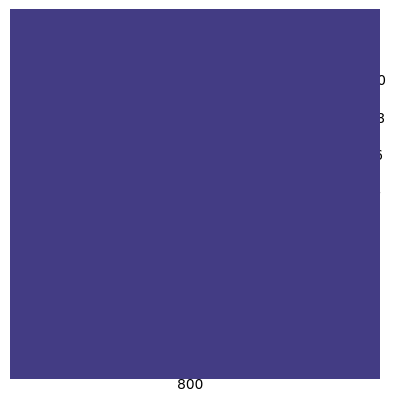

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = np.linspace(-100,100, 1000)
y = np.linspace(-100,100, 1000)
X,Y = np.meshgrid(x,y, indexing='ij')
Z = f(X,Y)
# im = ax.imshow(Z)
im = ax.imshow(Z, cmap='viridis')
plt.show()


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


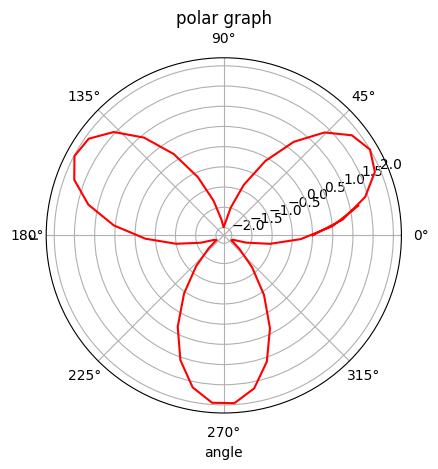

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
theta = np.linspace(0,6.5)
r = 2*np.sin(3 * theta)
ax.plot(theta, r, 'r')
ax.set_title('polar graph')
ax.set_xlabel('angle')
ax.set_ylabel('r')
fig.tight_layout()


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


(array([3.000e+00, 1.000e+01, 4.500e+01, 1.510e+02, 3.170e+02, 6.560e+02,
        9.970e+02, 1.392e+03, 1.711e+03, 1.624e+03, 1.342e+03, 8.830e+02,
        5.080e+02, 2.380e+02, 9.200e+01, 2.200e+01, 6.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([-3.78492897, -3.35705011, -2.92917124, -2.50129238, -2.07341352,
        -1.64553466, -1.2176558 , -0.78977694, -0.36189808,  0.06598078,
         0.49385964,  0.9217385 ,  1.34961736,  1.77749622,  2.20537509,
         2.63325395,  3.06113281,  3.48901167,  3.91689053,  4.34476939,
         4.77264825]),
 <BarContainer object of 20 artists>)

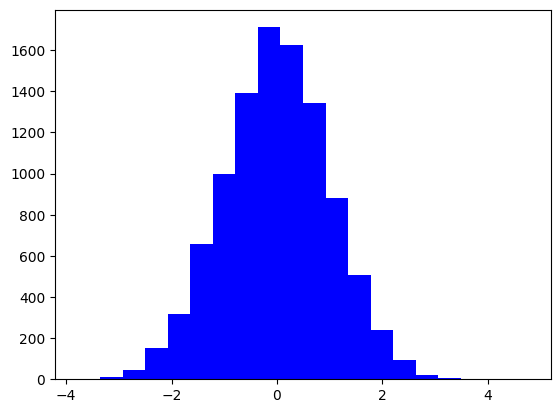

In [13]:
n = np.random.randn(10000)
plt.hist(n, 20, color='blue')


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


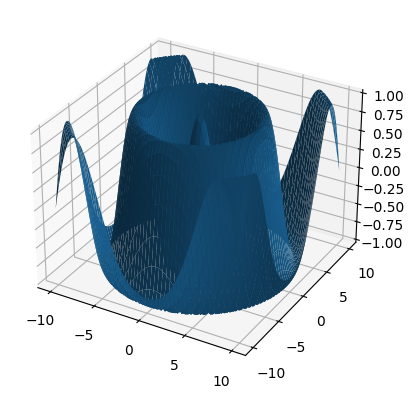

In [25]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.linspace(-10,10, 1000)
Y = np.linspace(-10,10, 1000)
X, Y = np.meshgrid(X, Y, indexing='ij')
Z = np.cos(np.sqrt(X**2 + Y**2))
surf = ax.plot_surface(X, Y, Z)

~# Domácí úkol
Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral`.
1. Vykreslete spirálu (např pro n=101) a sinus hodnot ve spirále pomocí `imshow` a `contour`.
2. Měřte časy výpočtu pro `integer_spiral_numpy` a `integer_spiral` pro různé hodnoty mezi 11 a 1001 a porovnejte je.
3. Vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů výpočtů do jednoho grafu, nastavte popisky, legendu a osy.
4. Co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu?
    - hint $g(x) = ax$ v log-log grafu ve skutečnosti znamená, že původní funkce vypadá: $\log (f(x)) = a \log(x)$, jaká je tedy $f(x)$?


In [15]:
def integer_spiral_numpy(n):
    # our matrix
    A = np.zeros((n,n))
    # numbers I will be inserting in matrix
    numbers = np.array([x+1 for x in np.arange(n**2)])
    index_numbers = 0
    # starting indexes
    start_row, start_col = n//2, n//2
    # one in the middle
    A[n//2, n//2] = 1
    #slice length, each cirle's edge length
    slice_lenght = 0

    for i in range(n//2):
        # move the starting index into the left corner of our current circle
        start_row -= 1
        start_col -= 1
        slice_lenght += 2

        # start_row and start_col is the top left corner of each circle. From this index I count the indexes in the matrix. Slice length is +2 every iteration. Next_index is the index in the numbers array, so I know which elements to put in matrix
        A[start_row, start_col:start_col + slice_lenght] = numbers[index_numbers + slice_lenght : index_numbers:-1]
        # move next index, so we can insert next numbers
        next_index = index_numbers + slice_lenght + 1
        A[start_row + 1 : start_row + 1 + slice_lenght, start_col] = numbers[next_index:next_index + slice_lenght]
        next_index += slice_lenght
        A[start_row + slice_lenght, start_col + 1: start_col + 1 + slice_lenght] = numbers[next_index:next_index + slice_lenght]
        next_index += slice_lenght
        A[start_row:start_row + slice_lenght, start_col + slice_lenght] = numbers[next_index + slice_lenght - 1:next_index - 1 :-1]

        index_numbers = next_index + slice_lenght - 1

    return A

In [16]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


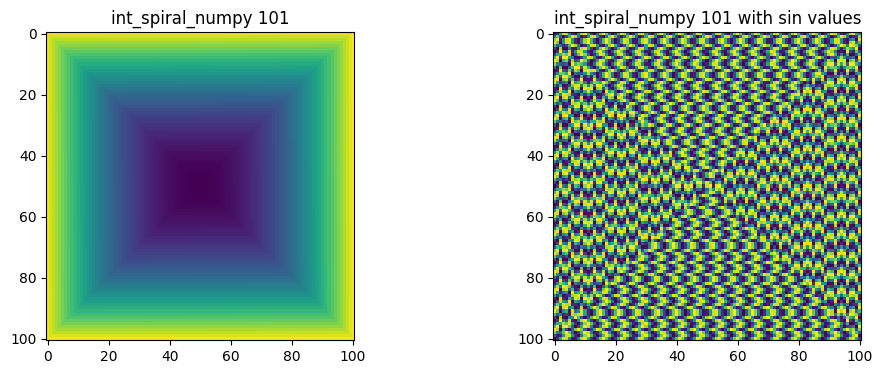

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
Z = integer_spiral_numpy(101)
ax[0].imshow(Z)
ax[0].set_title('int_spiral_numpy 101')
Z = np.sin(integer_spiral_numpy(101))
ax[1].set_title('int_spiral_numpy 101 with sin values')
ax[1].imshow(Z)

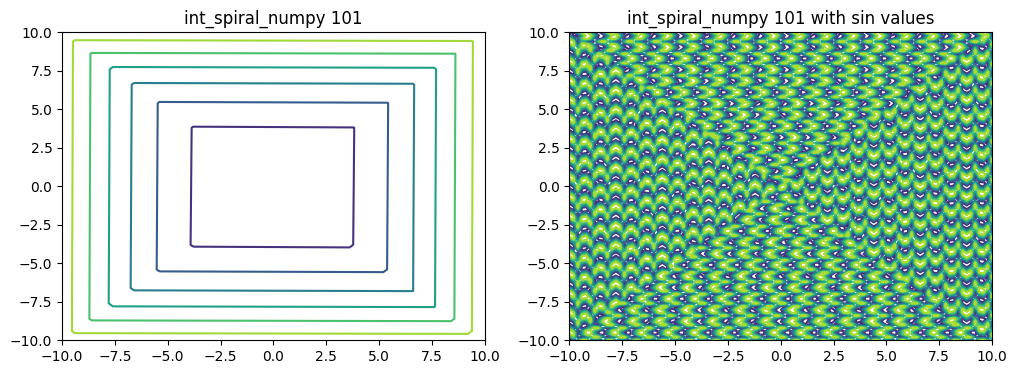

In [43]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
x = np.linspace(-10,10,101)
y = np.linspace(-10,10,101)
X, Y = np.meshgrid(x,y)
Z = integer_spiral_numpy(101)
ax[0].contour(X,Y,Z)
ax[0].set_title('int_spiral_numpy 101')
Z = np.sin(integer_spiral_numpy(101))
ax[1].set_title('int_spiral_numpy 101 with sin values')
ax[1].contour(X,Y,Z)

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.